# Desicion Tree del Target MatchKills

Integrantes:

*   Gonzalo Gallardo
*   Bárbara Palma Mena

Docente: Giocrisrai Godoy

Sección: MLY0100 - 002D

## Importar librerias


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import tree  # Para visualizar el árbol

In [ ]:
#Montar drive en el Notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Llamar archivo desde el drive
file_path = "/content/drive/MyDrive/Machine Learning- Counter Strike/csgo_datos_limpios.csv"
csgo = pd.read_csv(file_path, sep=",")

<ipython-input-6-1a743843a119>:3: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  csgo = pd.read_csv(file_path, sep=",")


##Análisis estadístico básico

In [ ]:
csgo.head()

,Map,Team,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,...,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,TotalGrenades,RoundDeaths,KDR
0,de_inferno,Terrorist,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,...,0,750,4400,0,0,0,0,4,1,0.0
1,de_inferno,Terrorist,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,...,0,800,4400,0,0,0,0,0,1,0.0
2,de_inferno,Terrorist,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,...,0,1000,4400,0,0,0,0,0,1,0.0
3,de_inferno,Terrorist,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,...,0,850,4400,0,0,0,0,0,1,0.0
4,de_inferno,Terrorist,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,...,0,1000,4400,0,0,0,0,2,0,0.0


In [ ]:
csgo.columns.tolist()

['Map',
 'Team',
 'RoundId',
 'RoundWinner',
 'MatchWinner',
 'Survived',
 'AbnormalMatch',
 'TimeAlive',
 'TravelledDistance',
 'RLethalGrenadesThrown',
 'RNonLethalGrenadesThrown',
 'PrimaryAssaultRifle',
 'PrimarySniperRifle',
 'PrimaryHeavy',
 'PrimarySMG',
 'PrimaryPistol',
 'FirstKillTime',
 'RoundKills',
 'RoundAssists',
 'RoundHeadshots',
 'RoundFlankKills',
 'RoundStartingEquipmentValue',
 'TeamStartingEquipmentValue',
 'MatchKills',
 'MatchFlankKills',
 'MatchAssists',
 'MatchHeadshots',
 'TotalGrenades',
 'RoundDeaths',
 'KDR']

In [ ]:
csgo.describe().T

,count,mean,std,min,25%,50%,75%,max
RoundId,79157.0,12.765517,7.432837,1.0,6.0,12.0,19.0,36.0
RLethalGrenadesThrown,79157.0,0.498667,0.597985,0.0,0.0,0.0,1.0,4.0
RNonLethalGrenadesThrown,79157.0,1.258057,1.184909,0.0,0.0,1.0,2.0,6.0
PrimaryAssaultRifle,79157.0,0.675363,0.464125,0.0,0.0,1.0,1.0,1.0
PrimarySniperRifle,79157.0,0.089840,0.279797,0.0,0.0,0.0,0.0,1.0
PrimaryHeavy,79157.0,0.005964,0.075497,0.0,0.0,0.0,0.0,1.0
PrimarySMG,79157.0,0.007046,0.082453,0.0,0.0,0.0,0.0,1.0
PrimaryPistol,79157.0,0.221787,0.415451,0.0,0.0,0.0,0.0,1.0
RoundKills,79157.0,0.671349,0.881798,0.0,0.0,0.0,1.0,5.0
RoundAssists,79157.0,0.146178,0.385601,0.0,0.0,0.0,0.0,4.0


## Selección de Target y predictor

In [ ]:
#Elegimos de target MatchKills por qué ayuda a predecir de mejor manera el rendimiento del jugador(Número total de enemigos eliminados por jugador durante toda la partida)
target = 'MatchKills'

# Variables predictoras seleccionadas por su alta correlación con el rendimiento ofensivo
predictors = [
    'MatchHeadshots',     # Precisión y efectividad
    'MatchFlankKills',    # Flanqueo estratégico
    'MatchAssists',      # Impactos exitosos
    'MatchWinner',        # Si el jugador ganó la partida

]
X= csgo[predictors]
y = csgo[target]

print(X)
print(y)

       MatchHeadshots  MatchFlankKills  MatchAssists MatchWinner
0                   0                0             0        True
1                   0                0             0        True
2                   0                0             0        True
3                   0                0             0        True
4                   0                0             0        True
...               ...              ...           ...         ...
79152               2                0             2       False
79153               3                5             1       False
79154               3                0             2       False
79155               0                0             1       False
79156               2                1             1       False

[79157 rows x 4 columns]
0        0
1        0
2        0
3        0
4        0
        ..
79152    4
79153    8
79154    5
79155    1
79156    5
Name: MatchKills, Length: 79157, dtype: int64


## Dividiendo el csv para entrenamiento y pruebas

In [ ]:
#Con test_size se divide 20% para pruebas y 80% entrenamiento
#Random_state garantiza que la partición sea la misma cada vez que se ejecute el notebook si se usa el mismo número en este caso 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
modelo = DecisionTreeRegressor(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

##Evaluación del modelo

In [ ]:
# Se generan las predicciones del modelo usando el conjunto de prueba
# Usando múltiples variables predictoras para estimar MatchKills
y_pred = modelo.predict(X_test)

# Calcula el MAE: mide en promedio cuánto se equivoca el modelo (error absoluto medio)
mae = mean_absolute_error(y_test, y_pred)

# Calcula el RMSE: penaliza más los errores grandes (raíz del error cuadrático medio)
rmse = mean_squared_error(y_test, y_pred)

# Calcula el R²: mide qué tan bien el modelo explica la variabilidad de MatchKills
r2 = r2_score(y_test, y_pred)

# Se imprimen las métricas de evaluación con formato amigable
print(f"MAE:  {mae:.2f}")   # Error absoluto promedio
print(f"RMSE: {rmse:.2f}")  # Error cuadrático medio (raíz)
print(f"R²:   {r2:.3f}")    # Coeficiente de determinación

MAE:  2.27
RMSE: 9.17
R²:   0.763


**Métricas**

MAE(2.27)= El modelo se equivoca en promedio cada 2.27 Kills, lo cual indica que es un error moderado.

RMSE(9.17)= Quiere decir que hay unos errores grandes que afectan la precisión del modelo.

R²(0.763): El árbol explica que el 76.3% de la variabilidad en los kills, eso es bueno pero menos preciso que lo que seria la regresión lineal múltiple.

## Visualización del modelo


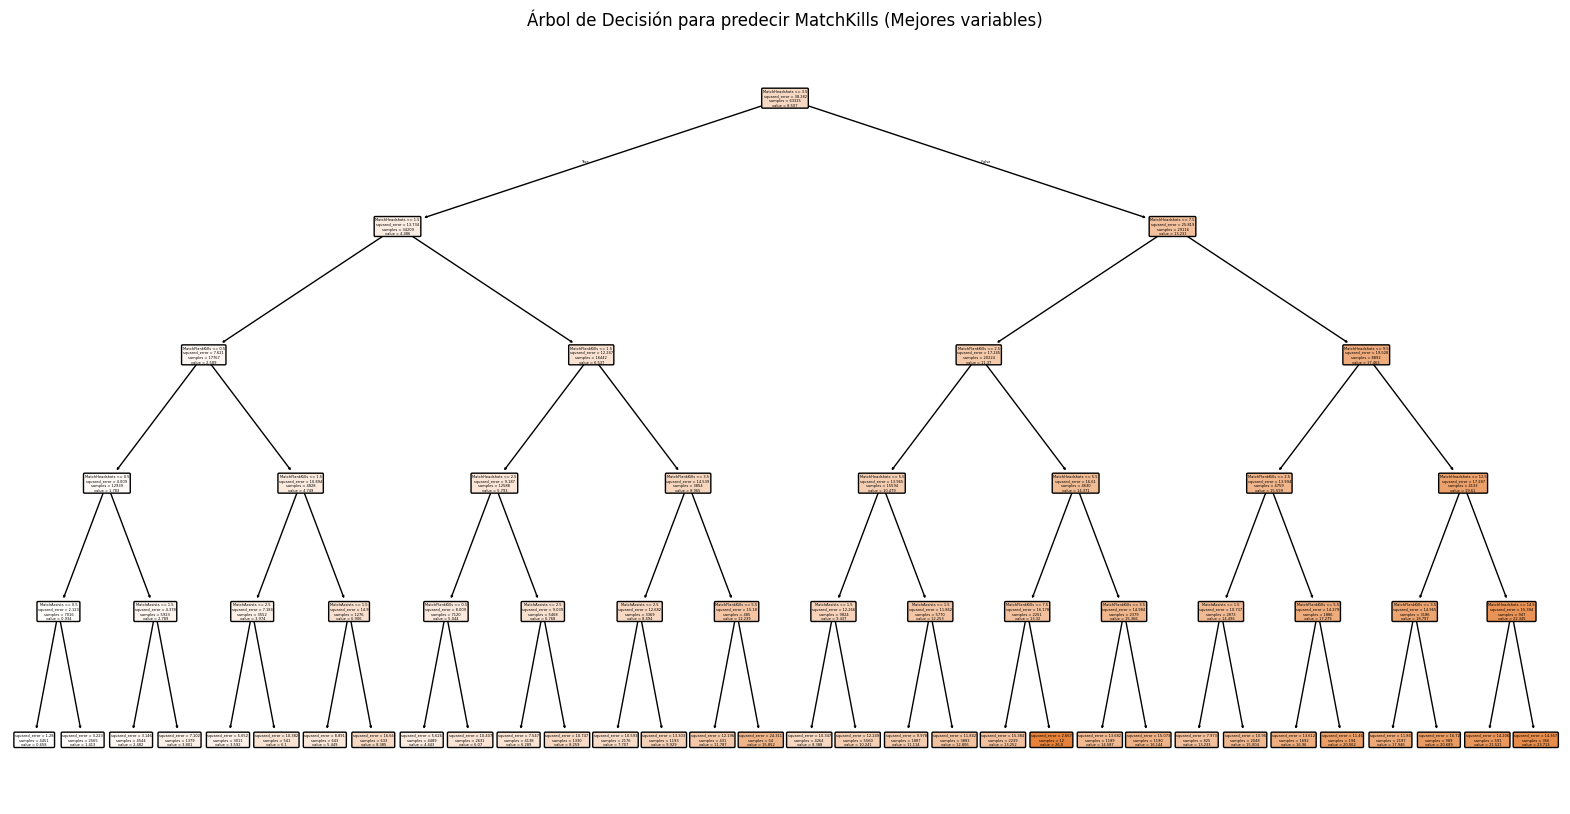

In [ ]:
plt.figure(figsize=(20, 10))
tree.plot_tree(modelo, feature_names=predictors, filled=True, rounded=True)
plt.title("Árbol de Decisión para predecir MatchKills (Mejores variables)")
plt.show()

**Análisis visual**


*  El árbol muestra ramas claras basadas en variables relevantes como MatchDamage, MatchShotsHit y MatchHeadshots, lo cual muestra decisiones jerárquicas en el desempeño ofensivo del jugador.
*  La estructura del árbol muestra cómo combinaciones específicas de estadísticas individuales (como daño, headshots, y muertes) llevan a diferentes niveles de kills.
*  El árbol tiene una profundidad moderada, lo cual evitaría el sobreajuste extremo, pero aún proporciona una buena segmentación de los datos.
*   Se observa que el modelo asigna más importancia a MatchDamage y MatchShotsHit, ya que a más daño y más impactos significan mayor probabilidad de kills.


